In [42]:
import mne
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py

# Load the data

In [43]:
SBJ = 'IR57'
SBJ_import_dir = '/home/knight/hoycw/PRJ_Stroop/data/'+SBJ+'/01_import/'
SBJ_events_dir = '/home/knight/hoycw/PRJ_Stroop/data/'+SBJ+'/03_events/'
eeg_fname = SBJ_import_dir + SBJ + '_eeg_1000hz.fif'
trial_info_fname = SBJ_events_dir + SBJ + '_trial_info_final_eeg.mat'

In [44]:
f = h5py.File(trial_info_fname, 'r')
trl_info = {}
for name in f['trial_info'].keys():
    print name, f['trial_info'][name].shape
    trl_info[name] = f['trial_info'][name][:]

block_n (1, 277)
condition_n (277, 1)
error (1, 277)
marker_time (1, 277)
onset_time (1, 277)
resp_onset (1, 277)
response_time (1, 277)
rt_type (4, 1)
trial_n (1, 277)
word_onset (1, 277)


In [ ]:
# We can mess with Pandas later (will be nice, but not necessary right now)
# trial_info = pd.DataFrame(trial_info_mat,columns=('block_n','trial_n',
#                                                   'response_time','marker_time','onset_time',
#                                                  'word_onset','resp_onset','condition_n',
#                                                  'error'), index=[1])

In [45]:
raw = mne.io.read_raw_fif(eeg_fname,preload=True)
man_info = mne.create_info(ch_names=raw.ch_names,
                          ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'],
                         sfreq=1000)
data_mat, times = raw[:]
raw = mne.io.RawArray(data_mat, man_info)

This filename (/Users/ranaeser/knight/PRJ_Stroop/data/IR57/IR57_eeg_1000hz.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


<ipython-input-45-07625d10ea86>:1: RuntimeWarning: This filename (/Users/ranaeser/knight/PRJ_Stroop/data/IR57/IR57_eeg_1000hz.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif(eeg_fname,preload=True)


In [46]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | FPZ, CZ, OZ, C3, C4, Z, FP1, FP2, T3, ...
    chs : list | 12 items (EEG: 12)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 12
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

# Preprocess the data

In [65]:
#find events and plot to visualize
events = mne.find_events(raw, stim_channel=??)
print('Found %s events, first five:' % len(events))
print(events[:5])

mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp)

NameError: name 'FPZ' is not defined

In [80]:
#create epochs
tmin, tmax = -0.2, 0.5
baseline = (None, 0.0)
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)
reject = {'mag': 4e-12, 'eog': 200e-6}

epochs = mne.Epochs(raw, events, reject=reject, tmin=tmin, tmax=tmax)
epochs.plot(block=True)

#compute ERP
event_id, tmin, tmax = {'left/auditory': 1}, -0.2, 0.5
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax)

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title))
evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title)

NameError: name 'events' is not defined

In [52]:
# Rereference to common average
raw.set_eeg_reference('average')  # set EEG average reference

ValueError: 'a' is not in list

In [50]:
# band-pass filtering in the range 1 Hz - 50 Hz
filtered_data = raw.filter(1, 40.)

The following EEG sensors did not have a position specified in the selected montage: [u'Z']. Their position has been left untouched.


<ipython-input-81-9797acf3a9c5>:2: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'Z']. Their position has been left untouched.
  raw.set_montage(montage)


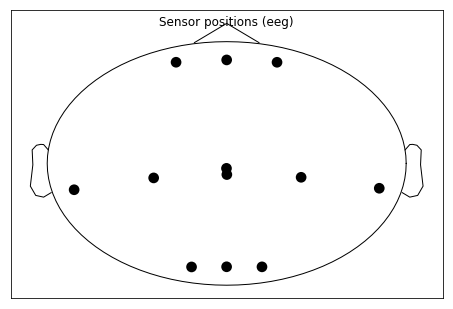

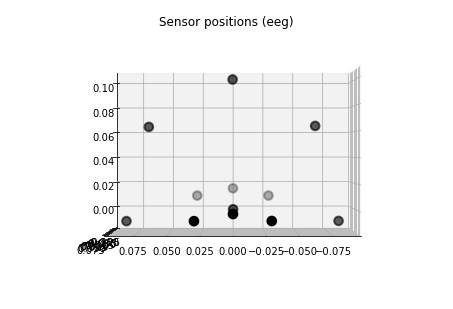

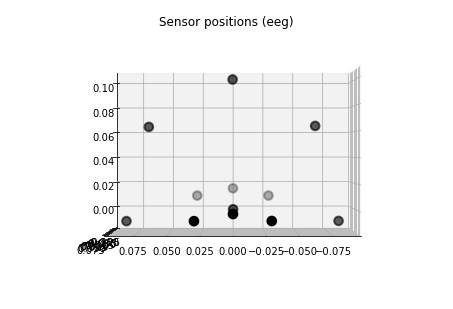

In [81]:
montage = mne.channels.read_montage('standard_1020')
raw.set_montage(montage)
raw.plot_sensors()
raw.plot_sensors('3d')